## Analyze baseline model performance

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_dir = os.path.join(os.getcwd(), '../../model')
sys.path.append(file_dir)
import baseline_model as mb

### Load train and test data

In [7]:
train_data_path = '/Users/finneyer/Documents/HSLU/Semester 3/DSPRO1/Projektarbeit/Data/Day/10_fixed/London_UTD19_train_Day_0.csv' # Insert train data path
test_data_path = '/Users/finneyer/Documents/HSLU/Semester 3/DSPRO1/Projektarbeit/Data/Day/10_fixed/London_UTD19_test_Day_0.csv' # Insert test data path

In [9]:
# Load data from dataset 1
train_data = pd.read_csv(train_data_path)
train_data = train_data.drop(columns=['long', 'lat', 'pos', 'length','fclass'], axis = 1)
test_data = pd.read_csv(test_data_path)
test_data = test_data.drop(columns=['long', 'lat', 'pos', 'length','fclass'], axis = 1)

In [10]:
train_data

,interval,detid,weekday,traffic
0,0.0,CNTR_N00/005g1,Friday,48
1,0.0,CNTR_N00/005g1,Saturday,48
2,0.0,CNTR_N00/005g1,Sunday,38
3,0.0,CNTR_N00/005g1,Monday,18
4,0.0,CNTR_N00/005g1,Tuesday,28
...,...,...,...,...
1611386,86400.0,SOUT_N10/313b1,Tuesday,6
1611387,86400.0,SOUT_N10/313b1,Wednesday,8
1611388,86400.0,SOUT_N10/313b1,Thursday,7
1611389,86400.0,SOUT_N10/313b1,Saturday,13


### Train the baseline models

In [3]:
models_path = '/Users/finneyer/Documents/HSLU/Semester 3/DSPRO1/Projektarbeit/models/Day/Baseline/baseline_10_fixed' # Insert models path

In [6]:
mb.train_random_baseline_models(train_data, models_path)

### Get predictions from the trained models

In [4]:
predictions = mb.get_random_baseline_prediction(models_path, 0)
predictions

,interval,traffic,detid
0,0,28,EAST_N05/095c1
12,3600,23,EAST_N05/095c1
24,7200,20,EAST_N05/095c1
36,10800,10,EAST_N05/095c1
48,14400,20,EAST_N05/095c1
...,...,...,...
228,68400,48,CNTR_N01/353j1
240,72000,92,CNTR_N01/353j1
252,75600,76,CNTR_N01/353j1
264,79200,53,CNTR_N01/353j1


### Evaluate the performance of the baseline models

In [8]:
evaluation = mb.evaluate_random_baseline_models(test_data, models_path)
evaluation

,Average MAE,Average MSE,Average R2
0,17.630936,628.380453,-0.815373


### Compare test data and predictions visually

In [78]:
train_data.detid.unique()[82]

'CNTR_N01/027c2'

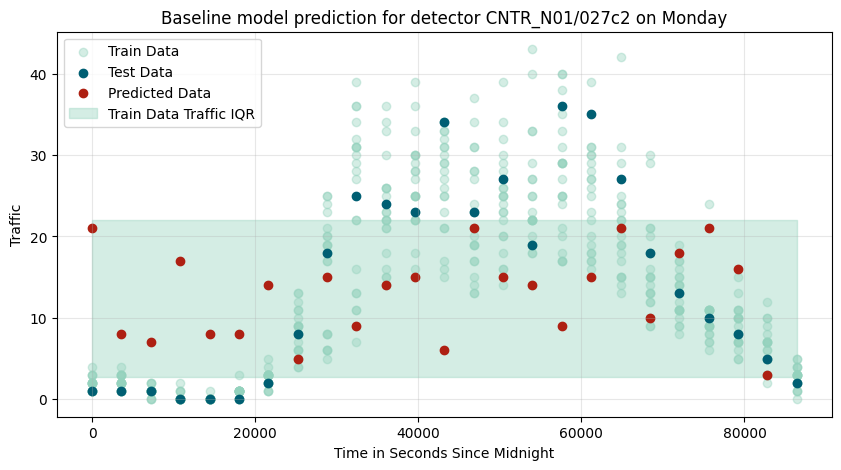

In [85]:
one_detid = train_data.detid.unique()[82]
one_sensor_data = predictions[predictions['detid'] == one_detid] 
X_pred = one_sensor_data.interval
y_pred = one_sensor_data.traffic

train_data_sensor = train_data[train_data['detid'] == one_detid]
X_train = train_data_sensor.interval
y_train = train_data_sensor.traffic

test_data_sensor = test_data[test_data['detid'] == one_detid]
X_test = test_data_sensor.interval
y_test = test_data_sensor.traffic

train_Q1 = train_data_sensor.traffic.quantile(0.25)
train_Q3 = train_data_sensor.traffic.quantile(0.75)

plt.figure(figsize=(10, 5))
plt.title("Baseline model prediction for detector CNTR_N01/027c2 on Monday")
plt.fill_between([0, 86400], train_Q1, train_Q3,color='#94D2BD', alpha=0.4, label='Train Data Traffic IQR')
plt.scatter(X_train, y_train, color="#94D2BD", alpha=0.4, label="Train Data") 
plt.scatter(X_test, y_test, color="#005F73", alpha=1, label="Test Data")    
plt.scatter(X_pred, y_pred, color="#AE2012", alpha=1, label="Predicted Data") 
# plt.axhline(y=train_Q1, color='green', linestyle='--', linewidth=2, label='Train Data Q1 Traffic')  
# plt.axhline(y=train_Q3, color='green', linestyle='--', linewidth=2, label='Train Data Q3 Traffic')  
plt.xlabel("Time in Seconds Since Midnight")  
plt.ylabel("Traffic")  

plt.grid(True, alpha=0.3)
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 2, 3, 0]
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc='upper left')

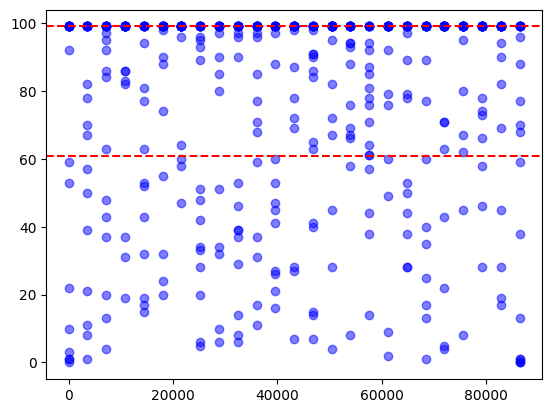

In [82]:
train_show_sensor = train_data[train_data.detid == 'EAST_N04/097c1']
x_show = train_show_sensor.interval
y_show = train_show_sensor.traffic
Q1 = y_show.quantile(0.25)
Q3 = y_show.quantile(0.75)

plt.scatter(x_show, y_show, color="blue", alpha=0.5, label="Test Data")
plt.axhline(y=Q1, color='red', linestyle='--')    
plt.axhline(y=Q3, color='red', linestyle='--')
 

In [16]:
train_data.traffic.mean()

np.float64(29.39517162501218)

In [83]:
Q1_all_sensors = train_data.traffic.quantile(0.25)
Q3_all_sensors = train_data.traffic.quantile(0.72)
print(Q1_all_sensors)
print(Q3_all_sensors)


6.0
39.0
